In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn import datasets

In [100]:
p = ['a','b','c']
for i,j in enumerate(p):
    print(i, j)
p

0 a
1 b
2 c


['a', 'b', 'c']

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [101]:
# Code starts here

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

reg_dict = pd.read_excel('RegularizationDataDictionary.xlsx')
samp_sub = pd.read_csv('sample_submission.csv')

Id = test['Id']


# Code ends here.

In [102]:
train.head()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [103]:
train.Landsize.describe()

count     4781.000000
mean       480.500105
std        899.489722
min          0.000000
25%        168.000000
50%        411.000000
75%        638.000000
max      37000.000000
Name: Landsize, dtype: float64

In [105]:
#reg_dict.set_index('Feature',inplace = True)
reg_dict.loc['Regionname'][0]

'General Region (West, North West, North, Northeast ...etc)'

In [ ]:
['Method','SellerG','Postcode','CouncilArea','Longitude']

In [106]:
train.drop('Id',axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

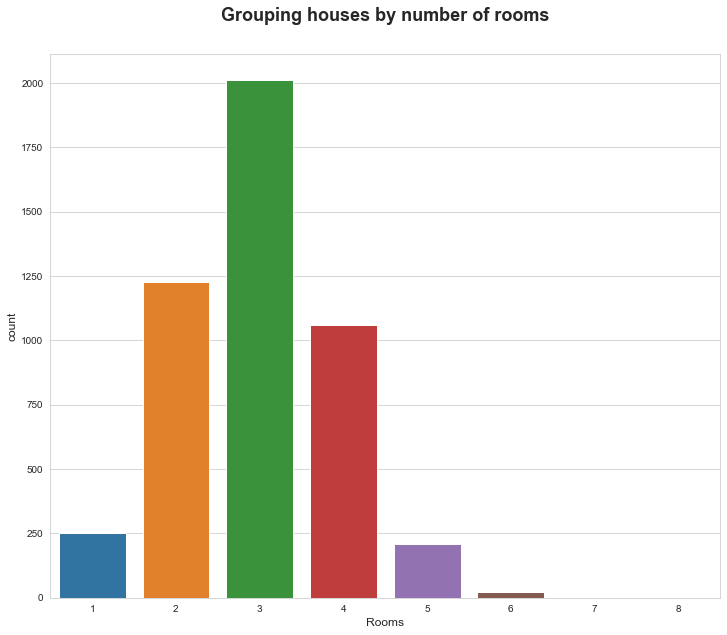

In [107]:
train.Rooms.value_counts()
plt.figure(figsize = [12,10])
plt.title('Grouping houses by number of rooms', fontsize=18, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=12)
plt.ylabel('Players Age', fontsize=12)
sns.set_style('whitegrid')
sns.countplot(train.Rooms)

In [108]:
train.corr()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.590817,0.523579,-0.053525,-0.029506,0.289699,0.050753,0.607276,0.420030,0.092030,0.595395,-0.056373,-0.207234,0.095944,-0.009092,-0.106854
Type,-0.590817,1.000000,-0.426876,0.088308,0.026955,-0.242188,0.018737,-0.276890,-0.278868,-0.043433,-0.386768,0.304479,0.159736,0.000434,0.055988,0.111803
Price,0.523579,-0.426876,1.000000,-0.048165,-0.065393,-0.158197,0.120166,0.493173,0.237160,0.072753,0.519207,-0.297060,-0.119382,0.217738,0.083803,-0.052399
Method,-0.053525,0.088308,-0.048165,1.000000,-0.008889,-0.064479,-0.034679,-0.013801,-0.019285,-0.021601,-0.048287,0.021274,0.018771,-0.059914,0.033184,-0.024244
SellerG,-0.029506,0.026955,-0.065393,-0.008889,1.000000,0.024476,-0.001913,-0.034939,-0.000271,-0.028470,-0.042596,-0.000680,-0.002784,-0.061029,0.023397,0.063498
Distance,0.289699,-0.242188,-0.158197,-0.064479,0.024476,1.000000,0.414110,0.114934,0.257264,0.063563,0.145823,0.252163,-0.280674,0.210853,-0.089077,-0.063805
Postcode,0.050753,0.018737,0.120166,-0.034679,-0.001913,0.414110,1.000000,0.088003,0.024650,0.030973,0.062701,0.027168,-0.059066,0.423931,0.006935,0.058458
Bathroom,0.607276,-0.276890,0.493173,-0.013801,-0.034939,0.114934,0.088003,1.000000,0.325872,0.080768,0.525465,0.162484,-0.102732,0.109001,0.037968,-0.058078
Car,0.420030,-0.278868,0.237160,-0.019285,-0.000271,0.257264,0.024650,0.325872,1.000000,0.112280,0.318675,0.108676,-0.164842,0.048052,0.005941,-0.032157
Landsize,0.092030,-0.043433,0.072753,-0.021601,-0.028470,0.063563,0.030973,0.080768,0.112280,1.000000,0.081878,0.032836,-0.049492,0.039890,-0.012608,-0.019397


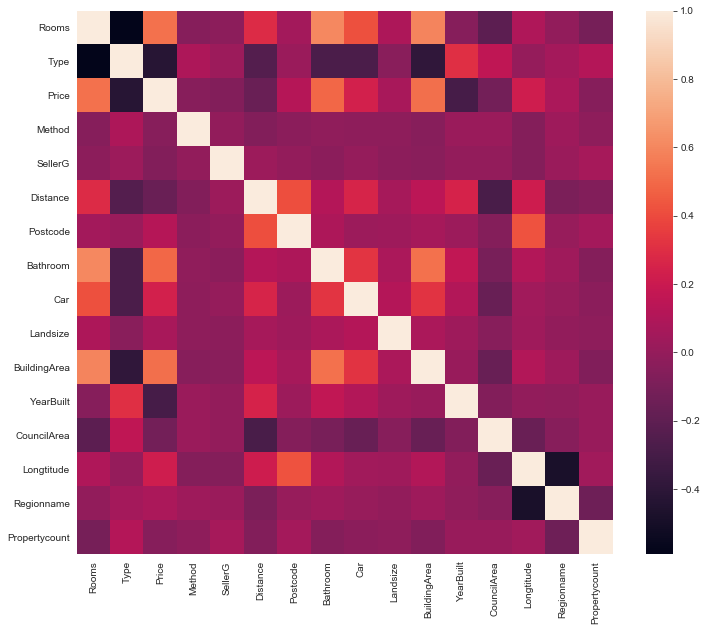

In [109]:

plt.figure(figsize = [12,10])
sns.heatmap(train.corr())

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [111]:
# Linear Regression

X = train.drop(['Price'], axis = 1)
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

pred = linreg.predict(X_test)

r2_score(pred, y_test)
# Code ends here.

0.3367854612858172

In [113]:
# polynomial fit 

poly = PolynomialFeatures(2)

X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

model = LinearRegression()

model.fit(X_train_2, y_train)

pred_2 = model.predict(X_test_2)

r2_score(pred_2, y_test)

0.6496614694454544

In [114]:
# Regularization Lasso

lasso = Lasso()
lasso.fit(X_train_2, y_train)
lasso_pred = lasso.predict(X_test_2)

r2_score(lasso_pred, y_test)

0.6366327355255055

In [116]:
# Regularization Ridge

ridge = Ridge()
ridge.fit(X_train_2, y_train)
ridge_pred = ridge.predict(X_test_2)

r2_score(ridge_pred, y_test)

0.6379292803439931

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [120]:
# Code starts here


#ridge_test_predict = ridge.predict(test)

#Id = test['Id']
#test.drop('Id', axis = 1, inplace = True)

test_2 = poly.fit_transform(test)

ridge_test_predict = ridge.predict(test_2)

print(ridge_test_predict)
# Code ends here.

[ 725951.97455356  848467.85569474 1774443.16531065 ...  901873.11365655
 2491164.78733245 1585154.40541872]


In [121]:
test.corr()

,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.556557,-0.036821,0.009831,0.288738,0.103298,0.626419,0.422040,0.113395,0.623652,-0.033288,-0.200526,0.098317,0.002968,-0.084860
Type,-0.556557,1.000000,0.087910,0.007679,-0.238961,-0.014222,-0.266786,-0.288730,-0.049486,-0.394855,0.359378,0.134839,0.006528,0.047909,0.065837
Method,-0.036821,0.087910,1.000000,-0.007517,-0.046301,-0.024472,0.010057,-0.002854,-0.002626,-0.021788,0.031889,0.029971,-0.024542,0.007767,-0.012526
SellerG,0.009831,0.007679,-0.007517,1.000000,0.031740,-0.003973,-0.017720,0.023572,0.032021,-0.007867,0.038715,0.004766,-0.050411,-0.008943,0.057581
Distance,0.288738,-0.238961,-0.046301,0.031740,1.000000,0.484886,0.142881,0.283090,0.121329,0.177274,0.273458,-0.272050,0.225675,-0.108745,-0.055038
Postcode,0.103298,-0.014222,-0.024472,-0.003973,0.484886,1.000000,0.162957,0.100393,0.057402,0.124063,0.057449,-0.094495,0.444289,-0.057421,0.060039
Bathroom,0.626419,-0.266786,0.010057,-0.017720,0.142881,0.162957,1.000000,0.357309,0.083257,0.575298,0.175733,-0.141258,0.142644,0.032105,-0.071178
Car,0.422040,-0.288730,-0.002854,0.023572,0.283090,0.100393,0.357309,1.000000,0.116048,0.364346,0.128083,-0.199755,0.091095,0.004322,-0.035845
Landsize,0.113395,-0.049486,-0.002626,0.032021,0.121329,0.057402,0.083257,0.116048,1.000000,0.085134,0.028222,-0.050882,-0.000546,-0.003035,-0.003945
BuildingArea,0.623652,-0.394855,-0.021788,-0.007867,0.177274,0.124063,0.575298,0.364346,0.085134,1.000000,0.025929,-0.173169,0.111291,0.025617,-0.042673


In [122]:
# Using Cross Validation 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
scorer = make_scorer(mean_squared_error, greater_is_better = False)

L1 = Lasso()
L2 = Ridge()


# cross validation with L1
rmse_L1 = -np.mean(cross_val_score(L1,X_train,y_train,scoring=scorer, cv=10))
print(rmse_L1)
# cross validation with L2
rmse_L2 = -np.mean(cross_val_score(L2,X_train,y_train,scoring=scorer, cv=10))
print(rmse_L2)

181244593000.3784
181310506682.5397


In [123]:
# Hyper-parameter Tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Code starts here

# instantiate lasso and ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# grid search on lasso and ridge
ridge_grid = GridSearchCV(estimator = ridge_model, param_grid = dict(alpha = ridge_lambdas))
ridge_grid.fit(X_train_2,y_train)

lasso_grid = GridSearchCV(estimator = lasso_model, param_grid = dict(alpha = lasso_lambdas))
lasso_grid.fit(X_train_2,y_train)

# make predictions 
lasso_pred = lasso_grid.predict(X_test_2)
ridge_pred = ridge_grid.predict(X_test_2)

# print out which is better
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y_test))
print(lasso_rmse)
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred,y_test))
print(ridge_rmse)

if lasso_rmse < ridge_rmse:
    best_model = 'LASSO'
else:
    best_model = 'RIDGE'

print(best_model)
# Code ends here

360702.63724694395
367528.3598978502
LASSO


In [124]:
r2_score(ridge_pred,y_test)

0.6403380048246974

In [125]:
r2_score(lasso_pred,y_test)

0.6366370924156397

In [41]:
ridge_predict = ridge_grid.predict(test_2)
lasso_predict = lasso_grid.predict(test_2)

In [43]:
submission = pd.DataFrame({'Id': Id, 'Price':ridge_predict})
submission.to_csv('third_submission.csv', index = False)

In [94]:
pd.DataFrame({'Id':Id, 'Price': lasso_predict})

,Id,Price
0,5067,7.243398e+05
1,3722,8.660108e+05
2,6820,1.839400e+06
3,3103,6.747442e+05
4,2820,9.428004e+05
...,...,...
2044,6339,9.822433e+05
2045,2687,9.413411e+05
2046,2564,8.922103e+05
2047,290,2.435413e+06


## Using Pipeline

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [279]:
X = train.drop(['Price'], axis = 1)
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 349, test_size = 0.2)

In [196]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
pca = PCA(n_components = 5)
X = pca.fit_transform(X)

# Questions

1. Why is Standard Scaler giving a worse score for linear pregression?
2. Why does the r2_score change drastically with changing random_state input?

In [280]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
preds = linreg.predict(X_test)
r2_score(preds, y_test)

0.6032317127303157

In [281]:
poly = PolynomialFeatures(2)

X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

test_2 = poly.fit_transform(test)

model = LinearRegression()

model.fit(X_train_2, y_train)

pred_2 = model.predict(X_test_2)

prediction = model.predict(test_2)
r2_score(pred_2, y_test)

0.7789715454417516

In [232]:
X_test_2.shape

(957, 136)

In [282]:
lasso = Lasso()
lasso.fit(X_train_2, y_train)
lasso_pred = lasso.predict(X_test_2)

lasso_prediction = lasso.predict(test_2)
r2_score(lasso_pred, y_test)

0.7648010563263425

In [283]:
ridge = Ridge()
ridge.fit(X_train_2, y_train)
ridge_pred = ridge.predict(X_test_2)

ridge_prediction = ridge.predict(test_2)

r2_score(ridge_pred, y_test)

0.7724162038401691

In [285]:
submission = pd.DataFrame({'Id': Id, 'Price':prediction})
submission.to_csv('forth_submission.csv', index = False)

In [222]:
submission

,Id,Price
0,5067,7.528320e+05
1,3722,8.543998e+05
2,6820,1.807767e+06
3,3103,6.806612e+05
4,2820,9.122926e+05
...,...,...
2044,6339,9.887275e+05
2045,2687,8.659426e+05
2046,2564,9.169625e+05
2047,290,2.422249e+06


In [305]:
def Rscore_random_state(random_state):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state, test_size = 0.2)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    preds = linreg.predict(X_test)
    a = r2_score(preds, y_test)
    
    poly = PolynomialFeatures(2)
    X_train_2 = poly.fit_transform(X_train)
    X_test_2 = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_2, y_train)
    pred_2 = model.predict(X_test_2)
    b = r2_score(pred_2, y_test)
    
    #print('R2_score with Linear Regression for Random State {} is {}'.format(random_state, a))
    #print('R2_score with Polynomial Regression for Random State {} is {}'.format(random_state, b))
    
    return (random_state, a,b)

In [306]:
import matplotlib.pyplot as plt

Duration: 39.488373041152954


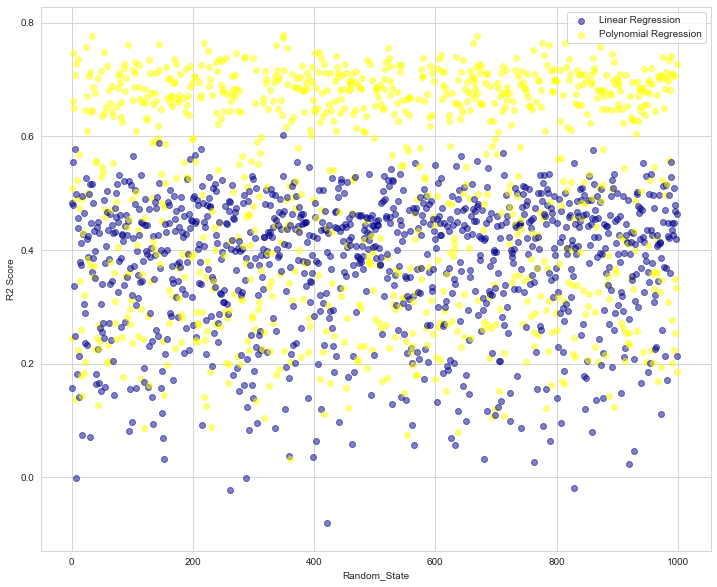

In [318]:
lst_lr = []
lst_pr = []
lst_rs = []
plt.figure(figsize = [12,10])
plt.xlabel('Random_State')
plt.ylabel('R2 Score')
start = time.time()
for n in range(0,1000):
    random_state, a, b = Rscore_random_state(n)
    plt.scatter(random_state,a, color = 'darkblue', alpha = 0.5)
    plt.scatter(random_state,b, color = 'yellow', alpha = 0.5)
    #print(Rscore_random_state(n))
    lst_pr.append(b)
    lst_lr.append(a)
    lst_rs.append(random_state)
plt.legend(['Linear Regression', 'Polynomial Regression'])
end = time.time()
print('Duration: {}'.format(end-start))

In [268]:
import time
time.time()

<function time.time>

In [290]:
max(lst_pr)

0.7598114052021494

In [276]:
lst_pr.index(0.7789715454417516)

349

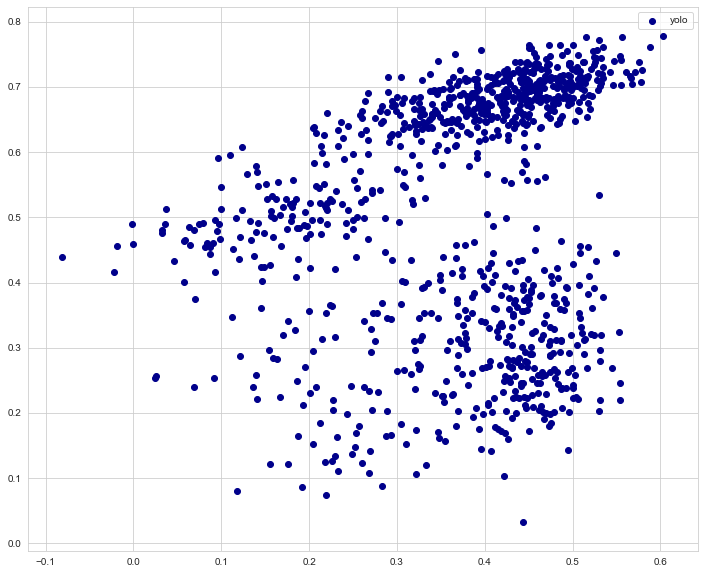

In [313]:
plt.figure(figsize = [12,10])
plt.scatter(lst_lr,lst_pr,color = 'darkblue')
plt.legend(['yolo'])

In [317]:
plt.style?